<center><h1><b>Марков Александр</b></h1><h3>Лаб. 1 🐕</h3></center>

## Оглавление
```
• Бинарная классификация перцептроном

• 4-х классовая классификация перцептроном
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Дан набор данных

In [3]:
data = (
    np.array([
        (1.1, -0.3),
        (-1.5, 3.3),
        (0.8, 0.4),
        (4.1, -2.2),
        (2.5, 2.5),
        (-1.2, 0.6)
    ]),
    np.array([1, 0, 1, 1, 0, 1])
)

In [4]:
X, y = data

Напишем класс перцептрона для бинарной классификации

In [5]:
class Perceptron:
    
    def fit(self, X, y, epoches=5, lr=0.8):
        self.weights = np.random.rand(len(X[0]))  # проинициализируем веса
        self.bias = np.random.rand()
        history_weights = []  # сюда веса в конце эпохи для красивого графика потом

        for epo in range(epoches):
            for x_i, y_i in zip(X, y):
                y_hat = np.dot(x_i, self.weights) + self.bias  # взвешенная сумма со смещением
                y_hat = 1 if y_hat>=0 else 0  # функция Хевисайда как функция активации
                self._update_weights(lr, y_i, y_hat, x_i)

            history_weights.append([self.weights, self.bias])
            print(f"#{epo+1}:\t weights: {self.weights},\tbias: {self.bias}")

        return history_weights
    
    def predict(self, X):
        y_hat = X @ self.weights + self.bias
        y_hat[y_hat >= 0] = 1
        y_hat[y_hat < 0] = 0
        
        return y_hat
    
    def _update_weights(self, lr, y, y_hat, x_i):
        self.weights += lr * (y - y_hat) * x_i
        self.bias += lr * (y - y_hat)
        
        return

In [6]:
model = Perceptron()
history_weights = model.fit(X, y)

#1:	 weights: [-0.63480787 -3.15576425],	bias: 0.042120645607186535
#2:	 weights: [-0.95480787 -2.35576425],	bias: 1.6421206456071866
#3:	 weights: [-0.31480787 -2.03576425],	bias: 2.4421206456071864
#4:	 weights: [-0.31480787 -2.03576425],	bias: 2.4421206456071864
#5:	 weights: [-0.31480787 -2.03576425],	bias: 2.4421206456071864


Построем график с разделением классов

[]

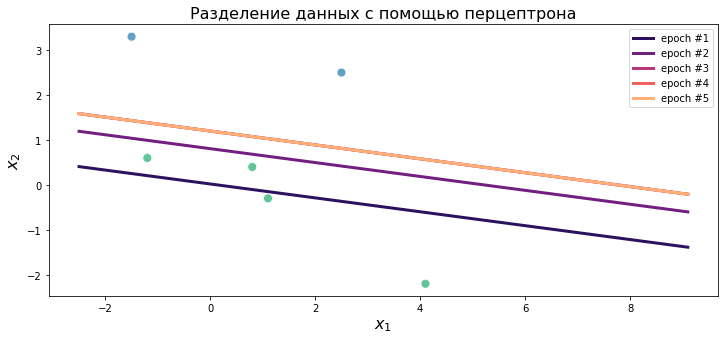

In [7]:
domain = np.linspace(min(X[:, 0])-1, max(X[:, 0])+5, 1000)

params = {'axes.labelsize': 16, 'axes.titlesize': 16}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="$x_1$", ylabel="$x_2$", title="Разделение данных с помощью перцептрона")

sns.scatterplot(x=X[:, 0], y=X[:, 1], s=80,
                c=[{1:"#62c598", 0:"#62a2c5"}[i] for i in y])

palette = sns.color_palette("magma", len(history_weights))

for epoch, item in enumerate(history_weights):
    w, bias = item
    x2 = -bias/w[1] - domain*w[0]/w[1]
    sns.lineplot(x=domain, y=x2, label=f"epoch #{epoch+1}", linewidth=3, color=palette[epoch])
        
plt.legend()
plt.plot()

Теперь зададим случайным образом три точки и классифицируем их

In [34]:
rand_points = np.random.rand(3, 2) * 3
rand_points

array([[0.22316496, 0.47221821],
       [1.40266208, 1.33003276],
       [1.5180769 , 0.41820752]])

In [35]:
result = model.predict(rand_points)
result

array([1., 0., 1.])

Видим, что две точки из сгенерированных классифицированы моделью как принадлежащие к классу `1`, а одна точка как принадлежащая к классу `0`. Проверим это визуально

> разумеется, если запустить этот код еще раз, то результат может быть другим

[]

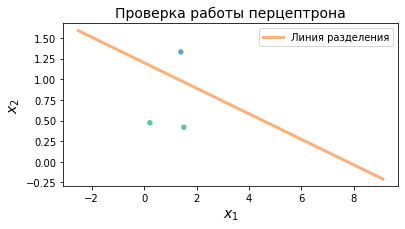

In [36]:
domain = np.linspace(min(X[:, 0])-1, max(X[:, 0])+5, 1000)

params = {'axes.labelsize': 14, 'axes.titlesize': 14}
plt.rcParams.update(params)
fig, ax = plt.subplots(figsize=(6, 3))
ax.set(xlabel="$x_1$", ylabel="$x_2$", title="Проверка работы перцептрона")
palette = sns.color_palette("magma", len(history_weights))

w, bias = history_weights[-1]
x2 = -bias/w[1] - domain*w[0]/w[1]
sns.lineplot(x=domain, y=x2, label=f"Линия разделения", linewidth=3, color=palette[-1])

sns.scatterplot(x=rand_points[:, 0], y=rand_points[:, 1], c=[{1:"#62c598", 0:"#62a2c5"}[i] for i in result])
        
plt.legend()
plt.plot()

---

Обучение на 50 эпохах

In [37]:
history_weights = model.fit(X, y, epoches=50);

#1:	 weights: [ 0.82869954 -2.02361485],	bias: 0.608690451154078
#2:	 weights: [-0.13130046 -1.54361485],	bias: 1.408690451154078
#3:	 weights: [-0.13130046 -1.54361485],	bias: 1.408690451154078
#4:	 weights: [-0.13130046 -1.54361485],	bias: 1.408690451154078
#5:	 weights: [-0.13130046 -1.54361485],	bias: 1.408690451154078
#6:	 weights: [-0.13130046 -1.54361485],	bias: 1.408690451154078
#7:	 weights: [-0.13130046 -1.54361485],	bias: 1.408690451154078
#8:	 weights: [-0.13130046 -1.54361485],	bias: 1.408690451154078
#9:	 weights: [-0.13130046 -1.54361485],	bias: 1.408690451154078
#10:	 weights: [-0.13130046 -1.54361485],	bias: 1.408690451154078
#11:	 weights: [-0.13130046 -1.54361485],	bias: 1.408690451154078
#12:	 weights: [-0.13130046 -1.54361485],	bias: 1.408690451154078
#13:	 weights: [-0.13130046 -1.54361485],	bias: 1.408690451154078
#14:	 weights: [-0.13130046 -1.54361485],	bias: 1.408690451154078
#15:	 weights: [-0.13130046 -1.54361485],	bias: 1.408690451154078
#16:	 weights: [-0.

[]

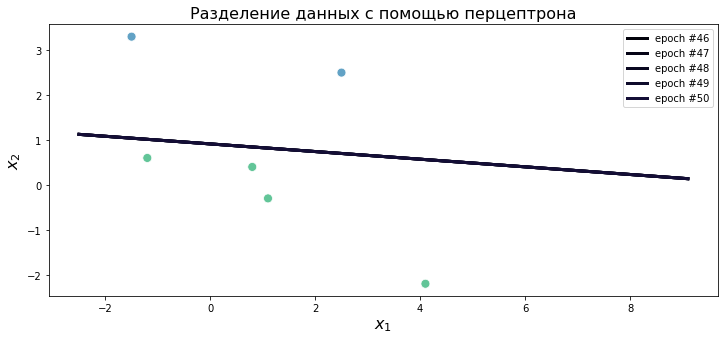

In [38]:
domain = np.linspace(min(X[:, 0])-1, max(X[:, 0])+5, 1000)

params = {'axes.labelsize': 16, 'axes.titlesize': 16}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="$x_1$", ylabel="$x_2$", title="Разделение данных с помощью перцептрона")

sns.scatterplot(x=X[:, 0], y=X[:, 1], s=80,
                c=[{1:"#62c598", 0:"#62a2c5"}[i] for i in y])

palette = sns.color_palette("magma", len(history_weights))

for epoch, item in enumerate(history_weights[-5:]):
    w, bias = item
    x2 = -bias/w[1] - domain*w[0]/w[1]
    sns.lineplot(x=domain, y=x2, label=f"epoch #{epoch+46}", linewidth=3, color=palette[epoch])
        
plt.legend()
plt.plot()

---

Меняем множество `y` так, чтобы классы стали линейно неразделимыми

In [39]:
rand_y = np.random.rand(len(y))
rand_y[rand_y>0.4] = 1
rand_y[rand_y!=1] = 0
rand_y

array([0., 0., 1., 1., 0., 1.])

In [40]:
rand_history_weights = model.fit(X, rand_y, epoches=6)

#1:	 weights: [ 0.03375477 -1.15620864],	bias: 0.39366205427915
#2:	 weights: [-0.20624523 -0.59620864],	bias: 0.39366205427915
#3:	 weights: [-0.20624523 -2.19620864],	bias: 0.39366205427915
#4:	 weights: [-1.40624523 -1.15620864],	bias: 1.19366205427915
#5:	 weights: [-0.76624523 -0.83620864],	bias: 1.99366205427915
#6:	 weights: [-0.76624523 -2.43620864],	bias: 1.99366205427915


[]

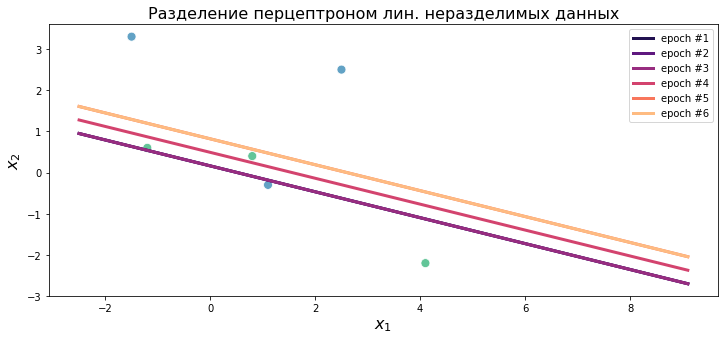

In [41]:
domain = np.linspace(min(X[:, 0])-1, max(X[:, 0])+5, 1000)

params = {'axes.labelsize': 16, 'axes.titlesize': 16}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="$x_1$", ylabel="$x_2$", title="Разделение перцептроном лин. неразделимых данных")

sns.scatterplot(x=X[:, 0], y=X[:, 1], s=80,
                c=[{1:"#62c598", 0:"#62a2c5"}[i] for i in rand_y])

palette = sns.color_palette("magma", len(rand_history_weights))

for epoch, item in enumerate(rand_history_weights):
    w, bias = item
    x2 = -bias/w[1] - domain*w[0]/w[1]
    sns.lineplot(x=domain, y=x2, label=f"epoch #{epoch+1}", linewidth=3, color=palette[epoch])
        
plt.legend()
plt.plot()

___

Вторая обучающая выборка

In [42]:
data_2 = (
    np.array([
        (3.6, 1.3),
        (-1.5, 4.9),
        (-2.8, 1.5),
        (1, -1.2),
        (-3.6, -4.8),
        (-0.8, -3.2),
        (2.2, -1.3),
        (3.4, 2.3)
    ]),

    np.array([
        (0, 0),
        (0, 1),
        (1, 1),
        (0, 0),
        (1, 0),
        (1, 0),
        (0, 0),
        (0, 0)
    ])
)

In [43]:
x_2, y_2 = data_2

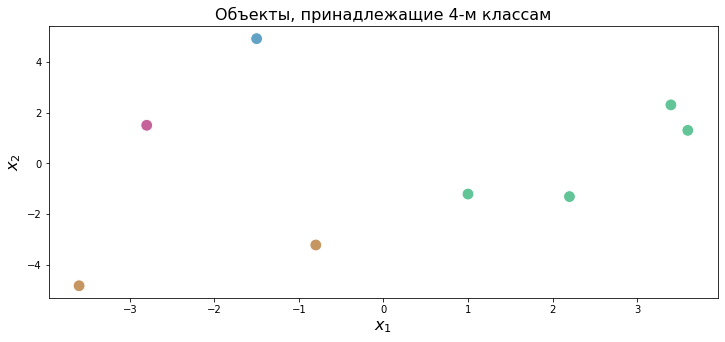

In [44]:
params = {'axes.labelsize': 16, 'axes.titlesize': 16}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="$x_1$", ylabel="$x_2$", title="Объекты, принадлежащие 4-м классам")

sns.scatterplot(
    x=x_2[:, 0], y=x_2[:, 1], s=140,
    c=[
        {(0,0):"#62c598", (0,1):"#62a2c5", (1,0):"#C59662", (1,1):"#C5629A"}[tuple(i)]
        for i in y_2
    ]
)

Перепишем перцептрон на четыреёклассовую классификацию

In [45]:
class FourClassPerceptron:
    def __init__(self):
        self.weights = None
        self.bias = None
        self.history_weights = []
    
    def fit(self, X, y, epoches=50, lr=1e-2):
        self.weights = np.random.rand(2, 2)
        self.bias = np.random.rand(2, 1)

        for epo in range(epoches):
            for x_i, y_i in zip(X, y):
                y_hat = self.weights @ x_i[:, np.newaxis] + self.bias 
                y_hat[y_hat >= 0] = 1
                y_hat[y_hat < 0] = 0
                
                self._update_weights(lr, y_i, y_hat, x_i)
            self.history_weights.append([self.weights.copy(), self.bias.copy()])



        return
    
    def predict(self, X):
        y_hat = weights @ X.T + bias
        y_hat[y_hat >= 0] = 1
        y_hat[y_hat < 0] = 0

        return y_hat
    
    def _update_weights(self, lr, y, y_hat, x_i):
        self.weights += lr * (y[:, np.newaxis]-y_hat) @ x_i[np.newaxis, :]
        self.bias += lr * (y[:, np.newaxis] - y_hat)
        
        return

In [46]:
meow = FourClassPerceptron()
four_class_history = meow.fit(x_2, y_2, epoches=5, lr=0.1)

[]

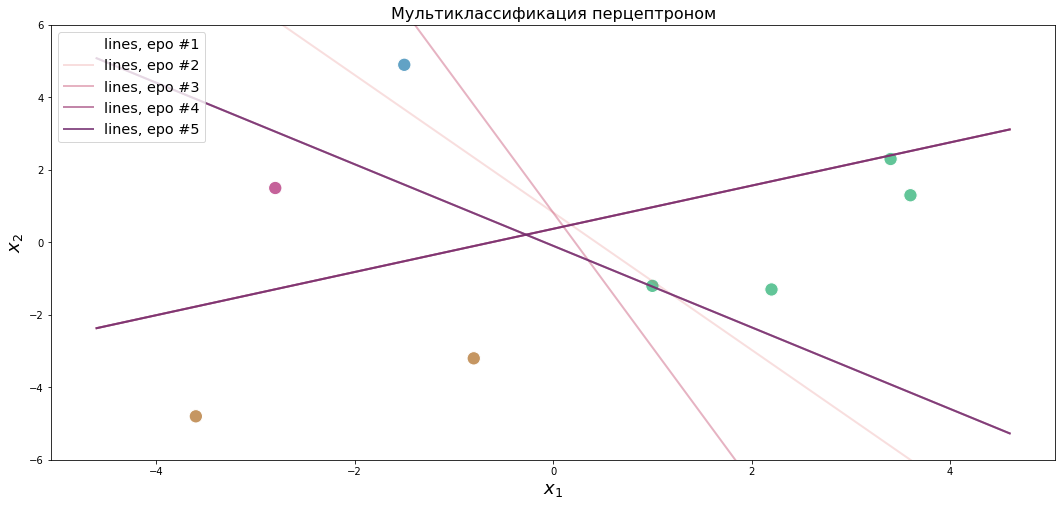

In [47]:
domain = np.linspace(min(x_2[:, 0])-1, max(x_2[:, 0])+1, 2)

params = {'axes.labelsize': 18, 'axes.titlesize': 16}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(18, 8))
ax.set(xlabel="$x_1$", ylabel="$x_2$", title="Мультиклассификация перцептроном")

palette = sns.color_palette("flare", len(meow.history_weights))
    
sns.scatterplot(
    x=x_2[:, 0], y=x_2[:, 1], s=180,
    c=[
        {(0,0):"#62c598", (0,1):"#62a2c5", (1,0):"#C59662", (1,1):"#C5629A"}[tuple(i)]
        for i in y_2
    ]
)

# for epo in range(len(four_class_history)):
for epo in range(len(meow.history_weights)):
    w, bias = meow.history_weights[epo]
    w = w[0, :]
    bias = bias[0]

    w2, bias2 = meow.history_weights[epo]
    w2 = w2[1, :]
    bias2 = bias2[1]

    x2 = -bias/w[1] - domain*w[0]/w[1]
    x22 = -bias2/w2[1] - domain*w2[0]/w2[1]
    sns.lineplot(x=domain, y=x2, label=f"lines, epo #{epo+1}", linewidth=2, color=palette[epo], alpha=epo*0.2)
    sns.lineplot(x=domain, y=x22, linewidth=2, color=palette[epo], alpha=epo*0.2)

plt.legend(loc='upper left', fontsize='x-large')
plt.ylim(-6, 6)
plt.plot()